In [52]:
%matplotlib inline
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages
from pylab import *
rcParams['legend.loc'] = 'best'

In [53]:
f = open('log_experiment1_model1.txt', 'r')
numbers = map(float, [line.split(': ')[-1] for line in f])
model1_stat = np.array(numbers).reshape((len(numbers) / 3, 3))
print model1_stat
f = open('log_experiment1_model2.txt', 'r')
numbers = map(float, [line.split(': ')[-1] for line in f])
model2_stat = np.array(numbers).reshape((len(numbers) / 3, 3))
print model2_stat

[[  2.45475769e-03   1.00000000e+00   0.00000000e+00]
 [  2.21705437e-03   1.00000000e+00   0.00000000e+00]
 [  2.17986107e-03   1.00000000e+00   0.00000000e+00]
 ..., 
 [  3.82440090e-02   1.30000000e+01   1.10000000e+01]
 [  6.09457493e-02   2.00000000e+01   1.90000000e+01]
 [  2.75216818e-01   5.20000000e+01   2.80000000e+01]]
[[  3.80342007e-02   1.00000000e+00   0.00000000e+00]
 [  3.11474800e-02   1.00000000e+00   0.00000000e+00]
 [  3.53271961e-02   1.00000000e+00   0.00000000e+00]
 ..., 
 [  6.15401983e-01   1.60000000e+01   9.00000000e+00]
 [  1.71423268e+00   4.80000000e+01   1.90000000e+01]
 [  4.02059197e+00   1.47000000e+02   5.10000000e+01]]


In [54]:
label1 = np.zeros(model1_stat.shape[0])
for i in range(0, len(label1), 200):
    for j in range(i, i + 200):
        label1[j] = (i // 200) * 3 + 1

In [55]:
model1_stat = np.vstack((model1_stat.T, label1)).T

In [56]:
label2 = np.zeros(model2_stat.shape[0])
for i in range(0, len(label2), 200):
    for j in range(i, i + 200):
        label2[j] = (i // 200) * 3 + 1

In [57]:
model2_stat = np.vstack((model2_stat.T, label2)).T

In [58]:
model2_stat

array([[  3.80342007e-02,   1.00000000e+00,   0.00000000e+00,
          1.00000000e+00],
       [  3.11474800e-02,   1.00000000e+00,   0.00000000e+00,
          1.00000000e+00],
       [  3.53271961e-02,   1.00000000e+00,   0.00000000e+00,
          1.00000000e+00],
       ..., 
       [  6.15401983e-01,   1.60000000e+01,   9.00000000e+00,
          2.50000000e+01],
       [  1.71423268e+00,   4.80000000e+01,   1.90000000e+01,
          2.50000000e+01],
       [  4.02059197e+00,   1.47000000e+02,   5.10000000e+01,
          2.50000000e+01]])

In [78]:
labels1 = [(i // 200) * 3 + 1 for i in range(0, len(label1), 200)]
means1time = [model1_stat[model1_stat[:,3] == ((i // 200) * 3 + 1)][:,0].mean() for i in range(0, len(label1), 200)]
maxes1time = [model1_stat[model1_stat[:,3] == ((i // 200) * 3 + 1)][:,0].max() for i in range(0, len(label1), 200)]
mines1time = [model1_stat[model1_stat[:,3] == ((i // 200) * 3 + 1)][:,0].min() for i in range(0, len(label1), 200)]

In [79]:
labels2 = [(i // 200) * 3 + 1 for i in range(0, len(label2), 200)]
means2time = [model2_stat[model2_stat[:,3] == ((i // 200) * 3 + 1)][:,0].mean() for i in range(0, len(label2), 200)]
maxes2time = [model2_stat[model2_stat[:,3] == ((i // 200) * 3 + 1)][:,0].max() for i in range(0, len(label2), 200)]
mines2time = [model2_stat[model2_stat[:,3] == ((i // 200) * 3 + 1)][:,0].min() for i in range(0, len(label2), 200)]

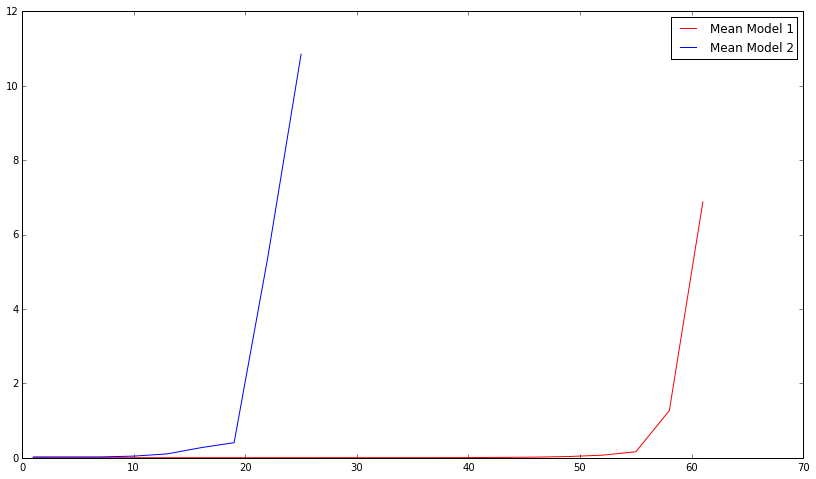

In [98]:
fig = plt.figure()
fig.set_size_inches(14, 8)

ax = plt.subplot(111)
ax.plot(labels1, means1time, 'r', label='Mean Model 1')
ax.plot(labels2, means2time, 'b', label='Mean Model 2')
#ax.fill_between(labels1, mines1, maxes1, alpha=0.1)
ax.legend()
plt.show()

In [87]:
means1prop = [model1_stat[model1_stat[:,3] == ((i // 200) * 3 + 1)][:,1].mean() for i in range(0, len(label1), 200)]
maxes1prop = [model1_stat[model1_stat[:,3] == ((i // 200) * 3 + 1)][:,1].max() for i in range(0, len(label1), 200)]
mines1prop = [model1_stat[model1_stat[:,3] == ((i // 200) * 3 + 1)][:,1].min() for i in range(0, len(label1), 200)]

In [86]:
means2prop = [model2_stat[model2_stat[:,3] == ((i // 200) * 3 + 1)][:,1].mean() for i in range(0, len(label2), 200)]
maxes2prop = [model2_stat[model2_stat[:,3] == ((i // 200) * 3 + 1)][:,1].max() for i in range(0, len(label2), 200)]
mines2prop = [model2_stat[model2_stat[:,3] == ((i // 200) * 3 + 1)][:,1].min() for i in range(0, len(label2), 200)]

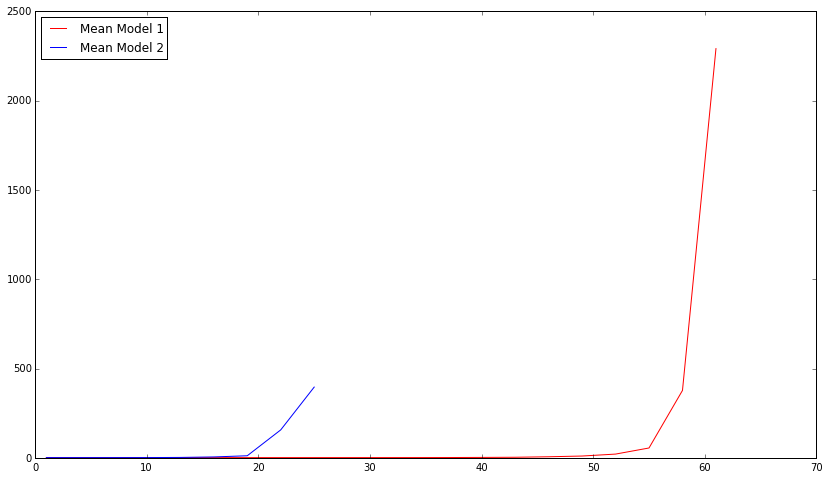

In [97]:
fig = plt.figure()
fig.set_size_inches(14, 8)

ax = plt.subplot(111)
ax.plot(labels1, means1prop, 'r', label='Mean Model 1')
ax.plot(labels2, means2prop, 'b', label='Mean Model 2')
ax.legend()
#ax.fill_between(labels1, mines1, maxes1, alpha=0.1)
plt.show()

In [89]:
means1split = [model1_stat[model1_stat[:,3] == ((i // 200) * 3 + 1)][:,2].mean() for i in range(0, len(label1), 200)]
maxes1split = [model1_stat[model1_stat[:,3] == ((i // 200) * 3 + 1)][:,2].max() for i in range(0, len(label1), 200)]
mines1split = [model1_stat[model1_stat[:,3] == ((i // 200) * 3 + 1)][:,2].min() for i in range(0, len(label1), 200)]

means2split = [model2_stat[model2_stat[:,3] == ((i // 200) * 3 + 1)][:,2].mean() for i in range(0, len(label2), 200)]
maxes2split = [model2_stat[model2_stat[:,3] == ((i // 200) * 3 + 1)][:,2].max() for i in range(0, len(label2), 200)]
mines2split = [model2_stat[model2_stat[:,3] == ((i // 200) * 3 + 1)][:,2].min() for i in range(0, len(label2), 200)]

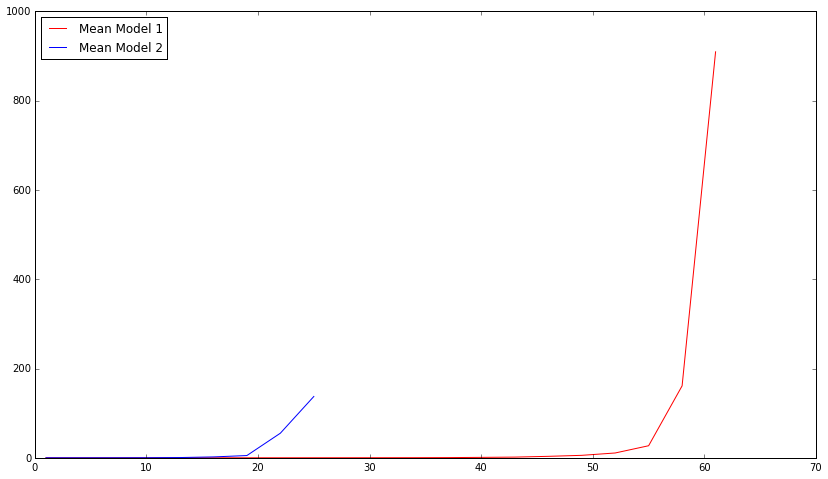

In [96]:
fig = plt.figure()
fig.set_size_inches(14, 8)

ax = plt.subplot(111)
ax.plot(labels1, means1split, 'r', label='Mean Model 1')
ax.plot(labels2, means2split, 'b', label='Mean Model 2')
ax.legend()
#ax.fill_between(labels1, mines1split, maxes1split, alpha=0.1)
plt.show()

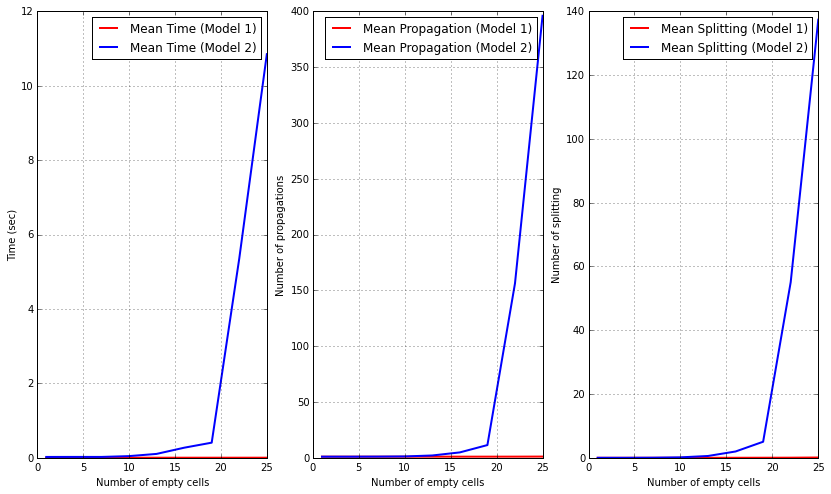

In [116]:
fig = plt.figure()
fig.set_size_inches(14, 8)

ax = plt.subplot(131)
ax.plot(labels1[:len(labels2)], means1time[:len(labels2)], 'r', linewidth=2, label='Mean Time (Model 1)')
ax.plot(labels2, means2time, 'b', linewidth=2, label='Mean Time (Model 2)')
#ax.fill_between(labels2, mines2time, maxes2time, alpha=0.1, color='r')
#ax.fill_between(labels1[:len(labels2)], mines1time[:len(labels2)], maxes1time[:len(labels2)], alpha=0.1)
ax.set_xlabel('Number of empty cells')
ax.set_ylabel('Time (sec)')
ax.grid(True)
ax.legend()

ax = plt.subplot(132)
ax.plot(labels1[:len(labels2)], means1prop[:len(labels2)], 'r', linewidth=2, label='Mean Propagation (Model 1)')
ax.plot(labels2, means2prop, 'b', linewidth=2, label='Mean Propagation (Model 2)')
ax.set_xlabel('Number of empty cells')
ax.set_ylabel('Number of propagations')
ax.grid(True)
ax.legend()

ax = plt.subplot(133)
ax.plot(labels1[:len(labels2)], means1split[:len(labels2)], 'r', linewidth=2, label='Mean Splitting (Model 1)')
ax.plot(labels2, means2split, 'b', linewidth=2, label='Mean Splitting (Model 2)')
ax.set_xlabel('Number of empty cells')
ax.set_ylabel('Number of splitting')
ax.grid(True)
ax.legend()
plt.show()
with PdfPages('models_comparison.pdf') as pdf:
    pdf.savefig(fig)
    plt.show()